# Sales Data Analysis 

## Introduction
In this project, we perform sales data analysis by querying a PostgreSQL database and using Python libraries like `pandas`, `matplotlib`, and `psycopg2`. We will:
- Query data from PostgreSQL using Python.
- Perform analysis using `pandas`.
- Visualize the results using `matplotlib` and `seaborn`.

---

## Libraries Used

1. **psycopg2**: 
   - A PostgreSQL database adapter for Python that allows you to connect and execute queries on a PostgreSQL database.
   - **Installation**: 
     ```bash
     pip install psycopg2
     ```
   - **Usage**: 
     - To connect to PostgreSQL.
     - To execute queries and retrieve data.

2. **pandas**: 
   - A Python library used for data manipulation and analysis. We use it to process the data extracted from PostgreSQL.
   - **Installation**:
     ```bash
     pip install pandas
     ```
   - **Usage**:
     - Dataframes for reading and manipulating data.
     - Grouping and analyzing trends.

3. **matplotlib & seaborn**: 
   - Libraries used for data visualization in Python.
   - **Installation**:
     ```bash
     pip install matplotlib seaborn
     ```
   - **Usage**:
     - Plotting trends and insights visually.

---



In [1]:
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

csv_file_path = "C:\\Users\\HP\\machine learning projects\\database\\cleaned_sales_data.csv"
df = pd.read_csv(csv_file_path, encoding='latin1')

In [3]:
# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname="sales_db",
    user="postgres",
    password="arpita11",
    host="localhost",
    port="5432"
)

# Create a cursor object
cursor = conn.cursor()
print("connection succesful.")

connection succesful.


In [4]:
# Iterate over DataFrame rows to insert data into PostgreSQL
for index, row in df.iterrows():
    sql_insert_query = """
        INSERT INTO sales_orders (RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, Country, City) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    
    cursor.execute(sql_insert_query, (
        row['Row ID'], 
        row['Order ID'], 
        row['Order Date'], 
        row['Ship Date'], 
        row['Ship Mode'], 
        row['Customer ID'], 
        row['Customer Name'], 
        row['Segment'], 
        row['Country'], 
        row['City']
    ))

# Commit the transaction to save changes in the database
conn.commit()

print("Data inserted successfully into the 'sales_orders' table.")


Data inserted successfully into the 'sales_orders' table.


In [7]:
sales_by_country = df.groupby('Country').size()
print(sales_by_country)


Country
United States    9994
dtype: int64


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert OrderDate to datetime

# Group by month and get order count
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).size()

print(monthly_sales)


Order Date
2014-01     79
2014-02     46
2014-03    157
2014-04    135
2014-05    122
2014-06    135
2014-07    143
2014-08    153
2014-09    268
2014-10    159
2014-11    318
2014-12    278
2015-01     58
2015-02     64
2015-03    138
2015-04    160
2015-05    146
2015-06    138
2015-07    140
2015-08    159
2015-09    293
2015-10    166
2015-11    324
2015-12    316
2016-01     89
2016-02     83
2016-03    163
2016-04    170
2016-05    225
2016-06    199
2016-07    201
2016-08    176
2016-09    363
2016-10    196
2016-11    370
2016-12    352
2017-01    155
2017-02    107
2017-03    238
2017-04    203
2017-05    242
2017-06    245
2017-07    226
2017-08    218
2017-09    459
2017-10    298
2017-11    459
2017-12    462
Freq: M, dtype: int64


In [11]:
sales_by_segment = df.groupby('Segment').size()
print(sales_by_segment)


Segment
Consumer       5191
Corporate      3020
Home Office    1783
dtype: int64


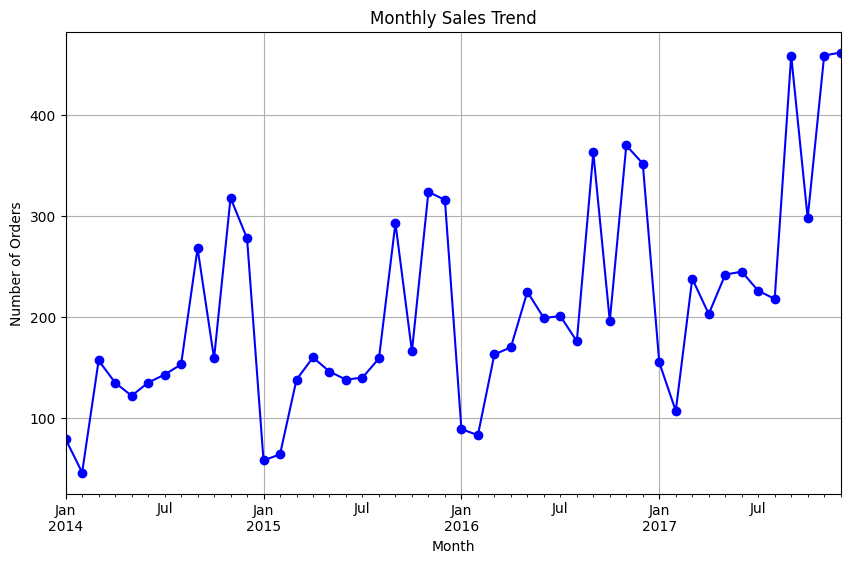

In [12]:
# Plot monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

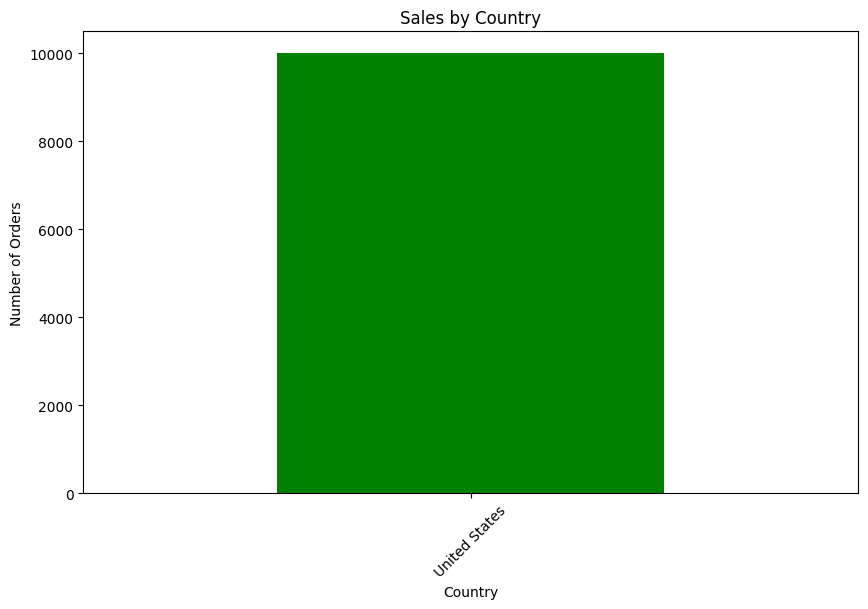

In [13]:
# Plot sales by country
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='g')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


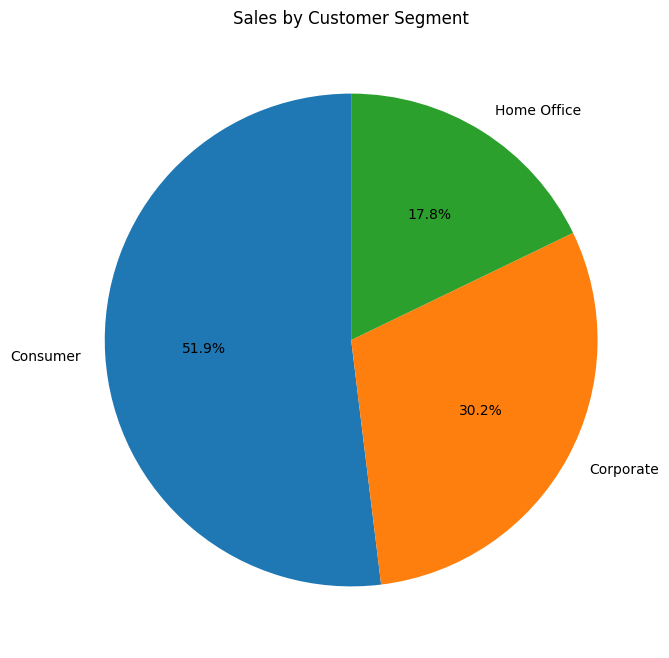

In [14]:
# Plot sales by customer segment
plt.figure(figsize=(8, 8))
sales_by_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Customer Segment')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [17]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])  # Convert ShipDate to datetime
df['Shipping_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate average shipping time
avg_shipping_time = df['Shipping_Time'].mean()
print(f"Average Shipping Time: {avg_shipping_time} days")


Average Shipping Time: 3.958174904942966 days


In [19]:
top_cities = df['City'].value_counts().head(5)
print(top_cities)


City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64
